In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))


## models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Any results you write to the current directory are saved as output.

## 1. Explore Titanic data set

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
test_temp = pd.read_csv("../input/test.csv")
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**split train data to features and labels**

In [4]:
train_labels = train['Survived']
train_features = train.drop('Survived', axis=1)
print(train_labels.head(3))
train_features.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## drop unuseful columns

In [5]:
print(train_features.shape)
print(test.isnull().sum())
train_features.isnull().sum()

(891, 11)
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Cabin has too many NaN values, so drop it and also drop intuitive unuseful attributes PassengerId Name and Ticket **

In [6]:
train_features = train_features.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1)
train_features.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

**Do the same for test data**

In [7]:
test = test.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis = 1)
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

## Fill the missing values

**Now only Age and Embarked have missing values, Show the histogram of age and embarked**
**Becuase age has missing values in 177 rows, so fill any constant value for all 177 rows will impact the result.**
**It is better to generate random number from gaussian distribution**


c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


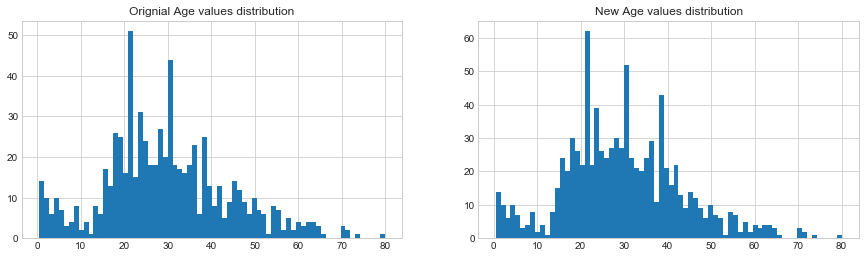

In [8]:
# fill the missing values with the median
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Orignial Age values distribution')
axis2.set_title('New Age values distribution')

# get average, std, and number of NaN values in titanic_df
train_mean_age = train_features["Age"].mean()
train_std_age = train_features["Age"].std()
count_NaN_age = train_features["Age"].isnull().sum()

test_mean_age = test["Age"].mean()
test_std_age = test["Age"].std()
count_test_NaN_age = test["Age"].isnull().sum()

# Generate random numbers between (mean -std) & (mean + std)
rand_NaN_age = np.random.randint(train_mean_age - train_std_age, train_mean_age + train_std_age, size = count_NaN_age)
test_rand_NaN_age = np.random.randint(test_mean_age - test_std_age, test_mean_age + test_std_age, size = count_test_NaN_age)

## plot original Age Values
## NOTE: drop all null values, and convrt to int
train_features['Age'].dropna().hist(bins=70, ax=axis1)

## fill NaN values in age column withrandom vlaues generated
train_features['Age'][np.isnan(train_features['Age'])] = rand_NaN_age
test['Age'][np.isnan(test['Age'])] = test_rand_NaN_age

#plot new Age age values
train_features['Age'].hist(bins=70, ax=axis2)

In [9]:
## fill the embark missing values
train_features["Embarked"] = train_features["Embarked"].fillna("S")
## fill the fare missing value
test["Fare"].fillna(test["Fare"].median(), inplace=True)
print(test.isnull().sum())
train_features.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
train_features.info()
test.info()
print(train_features["Sex"].value_counts())
print(test["Embarked"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB
male      577
female    314
Name: Sex, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [11]:
cleanup_nums = {"Sex": {"male":0, "female":1}, "Embarked": {"S":0, "C":1, "Q":2}}
train_features.replace(cleanup_nums, inplace=True)
test.replace(cleanup_nums, inplace=True)
train_features.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [12]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(train_features, train_labels)

Y_pred = random_forest.predict(test)

random_forest.score(train_features, train_labels)

0.9820426487093153

In [13]:
submission = pd.DataFrame({"PassengerId": test_temp["PassengerId"], "Survived":Y_pred})
submission.to_csv('titanic.csv', index=False)